In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd
from pathlib import Path

sys.path.append("../..")

In [3]:
import tensorflow as tf
import torch

from librep.transforms import TSNE
from librep.transforms import UMAP
from librep.datasets.multimodal import TransformMultiModalDataset, ArrayMultiModalDataset
from librep.metrics.dimred_evaluator import DimensionalityReductionQualityReport

2022-10-04 04:04:47.432347: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-04 04:04:47.432366: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
dataset = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(train_x, train_y), (test_x, test_y) = dataset

In [5]:
train_x_reordered = train_x.reshape((60000,-1))
print('TRAIN_X_REORDERED', train_x_reordered.shape)

test_x_reordered = test_x.reshape((10000,-1))
print('TEST_X_REORDERED', test_x_reordered.shape)


TRAIN_X_REORDERED (60000, 784)
TEST_X_REORDERED (10000, 784)


In [6]:
mnist_dataset_train = ArrayMultiModalDataset(X=train_x_reordered, y=train_y, window_slices=[(0, 28*28)], 
                                             window_names=["px"])
mnist_dataset_test = ArrayMultiModalDataset(X=test_x_reordered, y=test_y, window_slices=[(0, 28*28)], 
                                             window_names=["px"])

In [7]:
from librep.transforms.topo_ae import TopologicalDimensionalityReduction
from librep.estimators.ae.torch.models.topological_ae.topological_ae import TopologicallyRegularizedAutoencoder

In [8]:
mnist_dataset_train.X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Topologically Regularized DeepAE
Using python to compute signatures
Epoch:1, P:10, Loss:11305.7989, Loss-ae:7213.6113, Loss-topo:409.2188
Epoch:2, P:9, Loss:7944.6129, Loss-ae:7207.8717, Loss-topo:73.6741
Epoch:3, P:10, Loss:7908.7341, Loss-ae:7207.8581, Loss-topo:70.0876
Epoch:4, P:10, Loss:7893.4606, Loss-ae:7207.8585, Loss-topo:68.5602
Epoch:5, P:10, Loss:7908.8545, Loss-ae:7207.8604, Loss-topo:70.0994
Epoch:6, P:9, Loss:7917.4603, Loss-ae:7207.8728, Loss-topo:70.9588
Epoch:7, P:8, Loss:7906.3749, Loss-ae:7207.8712, Loss-topo:69.8504
Epoch:8, P:7, Loss:7908.7763, Loss-ae:7207.8689, Loss-topo:70.0907
Epoch:9, P:6, Loss:7899.3497, Loss-ae:7207.8656, Loss-topo:69.1484
Epoch:10, P:5, Loss:7897.0835, Loss-ae:7207.8651, Loss-topo:68.9218
Epoch:11, P:4, Loss:7903.7151, Loss-ae:7207.8630, Loss-topo:69.5852
Epoch:12, P:3, Loss:7884.0445, Loss-ae:7207.8549, Loss-topo:67.6190
Epoch:13, P:10, Loss:7872.3425, Loss-ae:7207.8570, Loss-topo:66.4486
Epoch:14, P:10, Loss:7891.0588, Loss-ae:7207.8544,

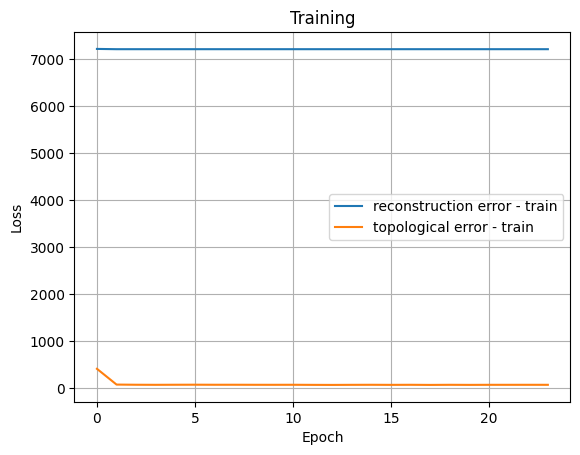

In [11]:
transform_topoae = TopologicalDimensionalityReduction(ae_model='DeepAE', lam=10.)
transform_topoae.fit(mnist_dataset_train.X, mnist_dataset_train.y)

In [ ]:
test_applied_topoae = transform_topoae.transform(mnist_dataset_test.X)

In [ ]:
print(test_applied_topoae.shape)

In [ ]:
from librep.transforms import TSNE
import numpy as np
import matplotlib.pyplot as plt

def visualize(X, Y):
    data_grouped = list(zip(X, Y))
    uniques = np.unique(Y)
    for uval in np.unique(Y):
        data = [pair[0] for pair in data_grouped if pair[1]==uval]
        data_x = [unit[0] for unit in data]
        data_y = [unit[1] for unit in data]
        plt.scatter(data_x, data_y, label = uval)
    # print(data)
    plt.legend()
    plt.show()


In [ ]:
transformed = TSNE().fit_transform(mnist_dataset_test.X)

In [ ]:
visualize(transformed, mnist_dataset_test.y)

In [ ]:
metrics_reporter = DimensionalityReductionQualityReport(sampling_threshold=128)
metrics_train_applied_topoae = metrics_reporter.evaluate([mnist_dataset_test, test_applied_topoae])
print(metrics_train_applied_topoae)

In [ ]:
metrics_reporter = DimensionalityReductionQualityReport(sampling_threshold=500)
metrics_train_applied_topoae = metrics_reporter.evaluate([mnist_dataset_test, test_applied_topoae])
print(metrics_train_applied_topoae)

In [ ]:
metrics_reporter = DimensionalityReductionQualityReport(sampling_threshold=1000)
metrics_train_applied_topoae = metrics_reporter.evaluate([mnist_dataset_test, test_applied_topoae])
print(metrics_train_applied_topoae)